In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Activation
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
#from scipy.stats import mode
from sklearn.model_selection import train_test_split


In [3]:
#Read training and test data
X_train_full=pd.read_csv('/kaggle/input/digit-recognizer/train.csv', header='infer').values
X_test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv', header='infer').values



In [4]:
#X_train.head()

In [5]:

#Separate label and images from the training data
X_train=X_train_full[:,1:]
y_train=X_train_full[:,0]



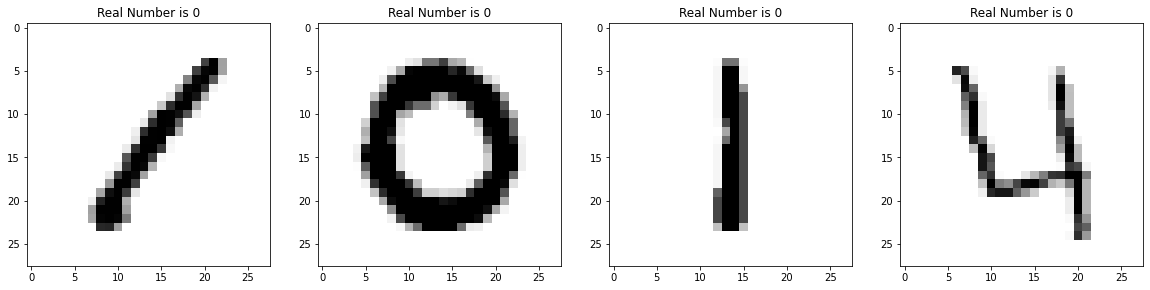

In [14]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");
    

In [6]:
#Normalize train and test images
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_test = (X_test.astype(np.float32) - 127.5)/127.5

In [8]:
del X_train_full



In [9]:
#Reshpae train and test images from 784 to 28 x 28 x 1
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)



In [10]:
#One-hot encode class labels
y_train_vectors=to_categorical(y_train)



In [11]:
print(X_train.shape)
print(X_test.shape)



(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [12]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train_vectors, test_size=0.2, random_state=2)


In [13]:
def my_model3():
    model=Sequential()
    model.add( Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(X_train.shape[1:])) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=48, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=80, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=112, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=144, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=160, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=176, kernel_size=(3,3), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Flatten())
    
    model.add(Dense(units=10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [25]:

def my_model5():
    model=Sequential()
    
    model.add( Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(X_train.shape[1:])) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=96, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False ) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=160, kernel_size=(5,5), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
        
    model.add(Flatten())
    
    model.add(Dense(units=10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [26]:
#Define model with 7 x 7 valid convolution, kernel_size=3, stride 1, and ReLU activation. 
#Also use BatchNormalization
def my_model7():
    model=Sequential()
    
    model.add( Conv2D(filters=48, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False, input_shape=(X_train.shape[1:])) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=96, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=144, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add( Conv2D(filters=192, kernel_size=(7,7), strides=(1,1), padding='valid', activation=None, use_bias=False) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
        
    model.add(Flatten())
    
    model.add(Dense(units=10))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [27]:
#model3=my_model3()
model5=my_model5()
model7=my_model7()

In [15]:
train_datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False
                            )

In [16]:
train_generator = train_datagen.flow(X_train, y_train,
                                     batch_size=120,
                                     shuffle=True)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val,
                                 batch_size=120,
                                 shuffle=True)


In [17]:

#Set how we plan to reduce learning rate on plateau
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_acc', 
                                patience=3,
                                verbose=1, 
                                factor=0.5,
                                min_lr=0.00001)

In [18]:
#fit 3 CNNs
model3.fit(train_generator, epochs=150, callbacks=[reduceLROnPlateau], validation_data=val_generator)
#model5.fit(train_generator, epochs=150, callbacks=[reduceLROnPlateau], validation_data=val_generator)
#model7.fit(train_generator, epochs=150, callbacks=[reduceLROnPlateau], validation_data=val_generator)

#Use 3-trained CNNs to make predictions. 
#Each prediction varialbe is a matrix of size 28K x 10 as there are 10 classes
prediction_vectors3=model3.predict(X_test)
#prediction_vectors5=model5.predict(X_test)
#prediction_vectors7=model7.predict(X_test)

print(prediction_vectors3.shape)
#print(prediction_vectors5.shape)
#print(prediction_vectors7.shape)

2022-03-01 17:23:13.970222: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150


2022-03-01 17:23:16.344409: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


280/280 [==============================] - 24s 55ms/step - loss: 0.4987 - accuracy: 0.9256 - val_loss: 0.5038 - val_accuracy: 0.9352
Epoch 2/150
280/280 [==============================] - 15s 54ms/step - loss: 0.2218 - accuracy: 0.9800 - val_loss: 0.1913 - val_accuracy: 0.9854
Epoch 3/150
280/280 [==============================] - 16s 57ms/step - loss: 0.1546 - accuracy: 0.9836 - val_loss: 0.2231 - val_accuracy: 0.9567
Epoch 4/150
280/280 [==============================] - 15s 52ms/step - loss: 0.1185 - accuracy: 0.9859 - val_loss: 0.1038 - val_accuracy: 0.9892
Epoch 5/150
280/280 [==============================] - 16s 56ms/step - loss: 0.0984 - accuracy: 0.9865 - val_loss: 0.1114 - val_accuracy: 0.9792 l
Epoch 6/150
280/280 [==============================] - 15s 55ms/step - loss: 0.0811 - accuracy: 0.9874 - val_loss: 0.0660 - val_accuracy: 0.9868
Epoch 7/150
280/280 [==============================] - 16s 56ms/step - loss: 0.0689 - accuracy: 0.9888 - val_loss: 0.0620 - val_accuracy: 0.

In [28]:
#fit 3 CNNs
#model3.fit(train_generator, epochs=150, callbacks=[reduceLROnPlateau], validation_data=val_generator)
model5.fit(train_generator, epochs=150, callbacks=[reduceLROnPlateau], validation_data=val_generator)
#model7.fit(train_generator, epochs=150, callbacks=[reduceLROnPlateau], validation_data=val_generator)

#Use 3-trained CNNs to make predictions. 
#Each prediction varialbe is a matrix of size 28K x 10 as there are 10 classes
#prediction_vectors3=model3.predict(X_test)
prediction_vectors5=model5.predict(X_test)
#prediction_vectors7=model7.predict(X_test)

#print(prediction_vectors3.shape)
#print(prediction_vectors5.shape)
#print(prediction_vectors7.shape)

Epoch 1/150
280/280 [==============================] - 16s 51ms/step - loss: 0.4671 - accuracy: 0.9391 - val_loss: 0.4585 - val_accuracy: 0.9235
Epoch 2/150
280/280 [==============================] - 13s 47ms/step - loss: 0.2204 - accuracy: 0.9829 - val_loss: 0.1803 - val_accuracy: 0.9863
Epoch 3/150
280/280 [==============================] - 13s 46ms/step - loss: 0.1532 - accuracy: 0.9854 - val_loss: 0.1163 - val_accuracy: 0.9905
Epoch 4/150
280/280 [==============================] - 14s 50ms/step - loss: 0.1121 - accuracy: 0.9881 - val_loss: 0.0840 - val_accuracy: 0.9915
Epoch 5/150
280/280 [==============================] - 13s 47ms/step - loss: 0.0916 - accuracy: 0.9891 - val_loss: 0.0797 - val_accuracy: 0.9899
Epoch 6/150
280/280 [==============================] - 14s 49ms/step - loss: 0.0759 - accuracy: 0.9896 - val_loss: 0.0759 - val_accuracy: 0.9904
Epoch 7/150
280/280 [==============================] - 13s 47ms/step - loss: 0.0649 - accuracy: 0.9902 - val_loss: 0.0625 - val_ac

In [32]:
average_prediction_vectors=(prediction_vectors3+prediction_vectors5+prediction_vectors7)/3.
predictions_final=np.argmax(average_prediction_vectors, axis=1)

In [33]:
#Read sample_submission.csv in dataframe sub
sub = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

#Overwrite labels in dataframe sub
sub["Label"] = predictions_final

#Write updated dataframes as submission.csv
sub.to_csv('submission.csv',index=False)
#sub.head()
